In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import pandas as pd
import cv2

In [2]:
path = '/home/jo/Desktop/Brain_Segmentation/brain_lesion_segmentation_clean_data/'
folders= sorted(glob.glob(path+'/*'))
cur_folder = folders[300]
mask_list = sorted(glob.glob(cur_folder+'/*mask.npy'))
after_regi_no_empty_slices_list = sorted(glob.glob(cur_folder+'/after_registration_no_empty*.npy'))
after_regi_list = glob.glob(cur_folder+'/after_registration*.npy')
after_regi_list = sorted([x for x in after_regi_list if x not in after_regi_no_empty_slices_list])
before_regi_list = sorted(glob.glob(cur_folder+'/before_*.npy'))
imgs_list= [before_regi_list,after_regi_list,after_regi_no_empty_slices_list,mask_list]
print(np.load(after_regi_list[0]).shape, np.load(after_regi_no_empty_slices_list[0]).shape)
print(np.load(before_regi_list[0]).shape, np.load(mask_list[0]).shape)

(46, 250, 250) (45, 250, 250)
(25, 240, 240) (45, 250, 250)


In [3]:
path = '/home/jo/Desktop/Brain_Segmentation/brain_lesion_segmentation_clean_data/'
folders= sorted(glob.glob(path+'/*'),key=lambda x: int(x.split('/')[-1].split(' ')[0][2:]))
dwi_list = [x+'/after_registration_no_empty_slices_dwi.npy' for x in folders]
mask_list = [x+'/after_registration_no_empty_slices_gt.npy' for x in folders]
dwi_mask_list = [x+'/dwi_mask.npy' for x in folders]
print('total_data_len:',len(dwi_list))

total_data_len: 651


In [4]:
img = np.load(dwi_list[0])
print(img.shape)

(45, 250, 250)


### shape summary

In [4]:
shape_summary = pd.DataFrame({'height':[], 'Resolution':[]})
for i in range(len(mask_list)):
    mask = np.load(mask_list[i])
    h,l,_ = mask.shape
    shape_summary = shape_summary._append({'height':h, 'Resolution':l},ignore_index=True)
print(shape_summary)

     height  Resolution
0      45.0       250.0
1      45.0       250.0
2      45.0       250.0
3      47.0       250.0
4      45.0       250.0
..      ...         ...
646    44.0       230.0
647    48.0       230.0
648    47.0       230.0
649    47.0       230.0
650    47.0       230.0

[651 rows x 2 columns]


In [5]:
shape_summary['height'].value_counts()

height
45.0    292
44.0    191
47.0     98
46.0     39
48.0     17
49.0      9
40.0      2
51.0      1
33.0      1
37.0      1
Name: count, dtype: int64

In [6]:
shape_summary['Resolution'].value_counts()

Resolution
250.0    388
230.0    253
240.0      3
251.0      2
220.0      1
249.0      1
227.0      1
239.0      1
233.0      1
Name: count, dtype: int64

IndexError: index 45 is out of bounds for axis 0 with size 45

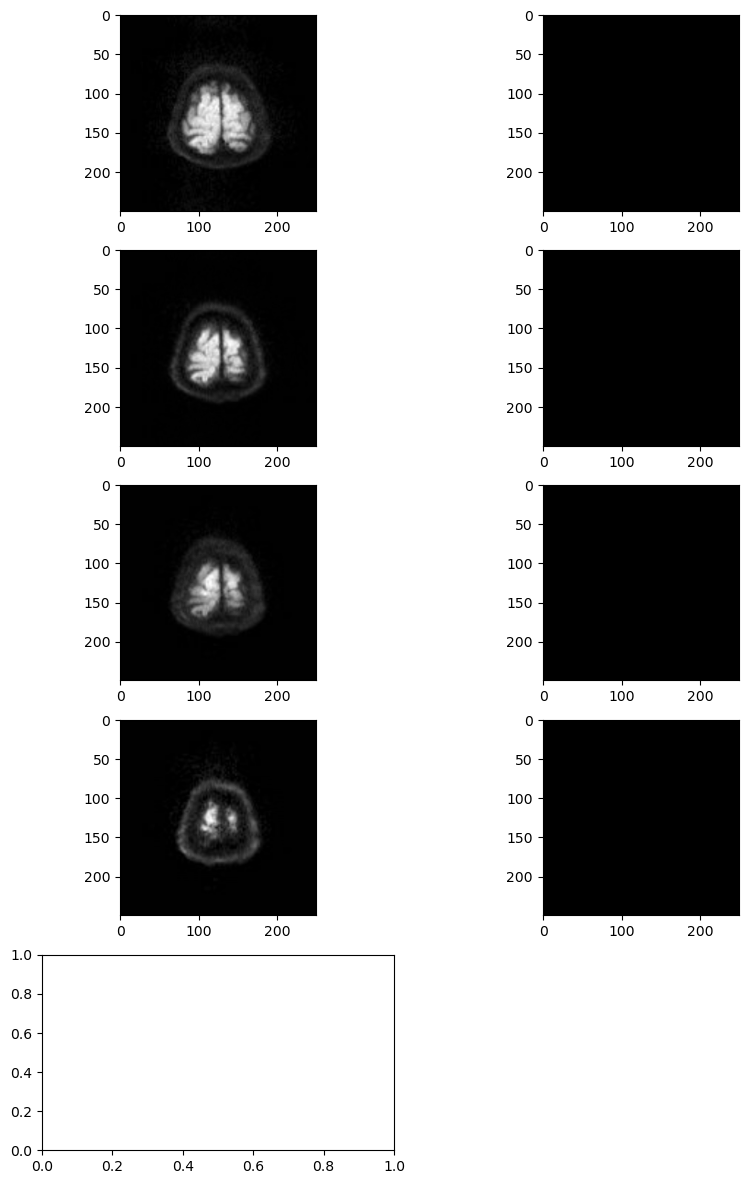

In [17]:
day=25
layer=41
fig = plt.figure(figsize=(10,30))
dwis = []
masks=[]
dwi = np.load(dwi_list[day])
mask = np.load(mask_list[day])
for i in range(5):
    # dwis.append(dwi[layer+i])
    # masks.append(mask[layer+i])
    fig.add_subplot(10,2,(i+1)*2-1).imshow(dwi[layer+i],cmap='gray')
    fig.add_subplot(10,2,(i+1)*2).imshow(mask[layer+i],cmap='gray')
plt.tight_layout()

36 0 173 250


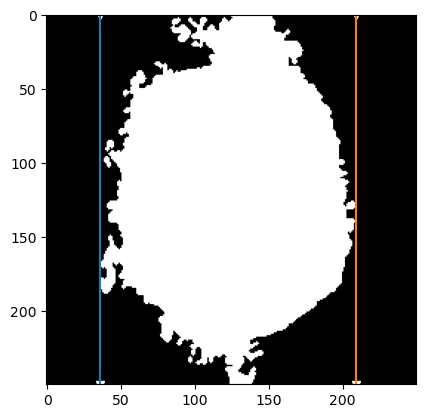

In [13]:
image = np.load(dwi_mask_list[25])[2]
image_cv = image.astype(np.uint8)*255
contour, hierarchy = cv2.findContours(image_cv, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
c = max(contour, key = cv2.contourArea)
x,y,w,h = cv2.boundingRect(c)
print(x,y,w,h)
plt.plot(x,y,color='white',marker='v')
plt.plot(x+w,y,color='white',marker='v')
plt.plot(x,y+h,color='white',marker='v')
plt.plot(x+w,y+h,color='white',marker='v')
plt.plot([x,x],[y,y+h])
plt.plot([x+w,x+w],[y,y+h])
plt.plot([x,x+w],[y,y])
plt.plot([x,x+w],[y+h,y+h])
plt.imshow(image,cmap='gray')

In [5]:
import preprocess as pp

In [11]:
for i in range(len(dwi_mask_list[25])-1):
    x,y ,w,h= pp.find_center(np.load(dwi_mask_list[25])[i])
    print(x,y,w,h)

122 129 171 222
122 121 171 243
122 125 173 250
125 125 178 250
122 125 202 250
122 124 173 206
122 122 173 204
128 125 185 206
128 126 182 207
126 126 181 201
123 133 168 207
125 136 163 209
123 134 169 214
122 126 173 203
122 117 173 222
123 122 174 236
126 120 165 213
126 126 167 199
127 130 164 187
123 123 148 171
122 123 152 171
127 133 164 184
120 133 153 180
127 126 138 158
127 122 138 166
126 137 163 203
126 130 164 189
127 126 162 235
128 125 168 250
128 129 162 185
128 130 160 174
129 129 163 169
128 128 161 165
128 128 158 162
127 128 161 161
125 128 159 158
127 127 154 155
126 120 149 138
126 127 147 149
126 128 147 148
126 125 149 155
126 126 143 148
127 129 136 137
125 126 129 140
126 120 123 140


IndexError: index 45 is out of bounds for axis 0 with size 45

In [12]:
image = np.load(dwi_mask_list[25])[2]
x,y ,w,h= pp.find_center(image)
print(x,y,w,h)

122 125 173 250
